In [27]:
from PIL import Image
import numpy as np
import pandas as pd
import pandas_datareader as pdr

In [2]:
im = Image.new(mode = '1', size = (128,128))

In [3]:
d = im.getdata()
new_image = []
for n,i in enumerate(d):
    if n in range(5000,7000):
        new_image.append(1)
    else:
        new_image.append(0)
        

In [4]:
im.putdata(new_image)
im.show()

In [30]:
aapl = pdr.DataReader("AAPL", 'iex')
aapl.head()

ValueError: The IEX Cloud API key must be provided either through the api_key variable or through the  environment variable IEX_API_KEY

In [7]:
mx = aapl.loc[:, ['Open', 'High', 'Low', 'Close']].max().max()
mn = aapl.loc[:, ['Open', 'High', 'Low', 'Close']].min().min()

In [8]:
m = 3*len(aapl)
n = 200

In [9]:
im = Image.new(mode = '1', size = (m, n))
volume_height = n * 0.2
volume_max = aapl.Volume.max()
volume_max

182602000.0

In [10]:
im.show()

In [11]:
volume = aapl.Volume
volume = volume/volume_max
volume = volume* volume_height
volume = round(volume)
volume.astype(int)

Date
2022-01-03    23
2022-01-04    22
2022-01-05    21
2022-01-06    21
2022-01-07    19
              ..
2022-11-25     8
2022-11-28    15
2022-11-29    18
2022-11-30    24
2022-12-01    16
Name: Volume, Length: 231, dtype: int32

In [12]:
img = np.array(im)
image = pd.DataFrame(img)

for i, j in zip(range(1, 689, 3), volume):
    image.iloc[-int(j):,i] = True
    


In [13]:
img = np.array(im)
pd.DataFrame(img)

,0,1,2,3,4,5,6,7,8,9,...,683,684,685,686,687,688,689,690,691,692
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
new_img = Image.fromarray(img)
new_img.show()

In [15]:
price_height = n - volume_height
points = round(((aapl.loc[:, ['Open', 'High', 'Low', 'Close']] - mn)/(mx - mn))*price_height)

In [16]:
def img_graph(data, height = 200):
    
    lenght = 3 * len(data)
    
    im = Image.new(mode = '1', size = (lenght, height))
    
    volume_height = height * 0.2
    volume_max = data['Volume'].max()
    data['Volume'] = round((data['Volume']/volume_max)*volume_height)
    
    maximum = data.loc[:, ['Open', 'High', 'Low', 'Close']].max().max()
    minimum = data.loc[:, ['Open', 'High', 'Low', 'Close']].min().min()
    
    price_height = height - volume_height
    data.loc[:, ['Open', 'High', 'Low', 'Close']] = round(((data.loc[:, ['Open', 'High', 'Low', 'Close']] - minimum)/(maximum - minimum)) * price_height)

    matrix = pd.DataFrame(np.array(im))
    
    for i,j in zip(range(1, lenght - 1, 3), data.index):
        
        o = price_height - int(data.loc[j, 'Open'])
        h = price_height - int(data.loc[j,'High'])
        l = price_height - int(data.loc[j,'Low'])
        c = price_height - int(data.loc[j,'Close'])
        v = -int(data.loc[j, 'Volume'])
        
        matrix.iloc[int(o),int(i) - 1] = True
        matrix.iloc[int(h):int(l) + 1, int(i)] = True
        matrix.iloc[int(c), int(i) + 1] = True
        matrix.iloc[v:, int(i)] = True
        
    graph = Image.fromarray(np.array(matrix))
    graph.show()

img_graph(aapl)        

In [41]:
points

,Open,High,Low,Close
Date,,,,
2022-01-03,145.0,160.0,144.0,157.0
2022-01-04,159.0,160.0,149.0,150.0
2022-01-05,150.0,152.0,135.0,136.0
2022-01-06,130.0,137.0,126.0,128.0
2022-01-07,130.0,134.0,125.0,128.0
...,...,...,...,...
2022-11-23,61.0,68.0,60.0,65.0
2022-11-25,57.0,59.0,54.0,57.0
2022-11-28,48.0,52.0,43.0,45.0


In [57]:
mod = pd.DataFrame(np.array(new_img))

for i, j in zip(range(1, 689, 3), points.index):
    o = price_height - int(points.loc[j, 'Open'])
    h = price_height - int(points.loc[j,'High'])
    l = price_height - int(points.loc[j,'Low'])
    c = price_height - int(points.loc[j,'Close'])
    
    mod.iloc[int(o),int(i) - 1] = True
    mod.iloc[int(h):int(l) + 1, int(i)] = True
    mod.iloc[int(c), int(i) + 1] = True
    


In [48]:
for i, j in zip(range(1, 689, 3), points):
    print(j)

Open
High
Low
Close


In [60]:
new_img = Image.fromarray(np.array(mod))
new_img.show()

<AxesSubplot:xlabel='Date'>

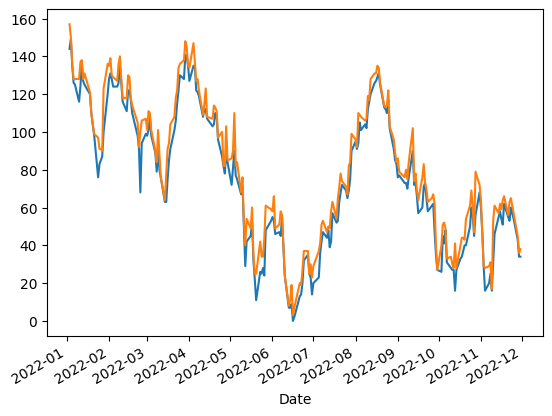

In [55]:
points.Low.plot()
points.Close.plot()

In [56]:
points.head(15)

,Open,High,Low,Close
Date,,,,
2022-01-03,145.0,160.0,144.0,157.0
2022-01-04,159.0,160.0,149.0,150.0
2022-01-05,150.0,152.0,135.0,136.0
2022-01-06,130.0,137.0,126.0,128.0
2022-01-07,130.0,134.0,125.0,128.0
2022-01-10,119.0,129.0,116.0,128.0
2022-01-11,128.0,137.0,124.0,137.0
2022-01-12,140.0,143.0,136.0,138.0
2022-01-13,139.0,141.0,127.0,128.0


In [4]:
import talib
import numpy as np

In [5]:
talib.HT_TRENDLINE(np.array(range(1,100)))

Exception: input array type is not double